In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('d://Admission_Predict.csv')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
x=df.drop(['Serial No.'], axis=1)
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [7]:
x.drop(['Chance of Admit '], axis=1,inplace=True)

In [8]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [9]:
y=df['Chance of Admit ']

In [10]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2)

In [13]:
ytrain

97     0.86
249    0.77
228    0.71
291    0.56
162    0.67
       ... 
104    0.74
124    0.57
215    0.93
127    0.78
395    0.82
Name: Chance of Admit , Length: 320, dtype: float64

In [14]:
model=LinearRegression()

In [15]:
model.fit(xtrain,ytrain)

LinearRegression()

In [16]:
model.predict(xtest)

array([0.88348519, 0.63886604, 0.49837429, 0.7088213 , 0.49047054,
       0.89473742, 0.51891431, 0.92366315, 0.687209  , 0.84743912,
       0.44602303, 0.78653811, 0.46050291, 0.61000955, 0.77009273,
       0.70833572, 0.70044317, 0.64084522, 0.77266545, 0.78027373,
       0.56074551, 0.54341376, 0.50149341, 0.62736576, 0.76657975,
       0.58278867, 0.6003334 , 0.57050495, 0.69728076, 0.83803614,
       0.84026837, 0.69749939, 0.92822668, 0.88476519, 0.91993906,
       0.64572691, 0.58650233, 0.79250126, 0.62670474, 0.93791475,
       0.61334707, 0.66154033, 0.89838299, 0.60228194, 0.69922084,
       0.65365458, 0.77946019, 0.9581087 , 0.57274804, 0.64878512,
       0.82286724, 0.96608908, 0.71660293, 0.60757985, 0.81233639,
       0.74137823, 0.8008791 , 0.81203481, 0.87448483, 0.74154519,
       0.67393396, 0.77687645, 0.42679043, 0.55328138, 0.50735139,
       0.50054302, 0.93022568, 0.48607881, 0.90389535, 0.85514308,
       0.81519772, 0.70438242, 0.94857276, 0.82081001, 0.93278

In [17]:
ytest_np=np.array(ytest)
ytest_np

array([0.93, 0.61, 0.46, 0.73, 0.54, 0.92, 0.56, 0.94, 0.64, 0.86, 0.46,
       0.79, 0.47, 0.65, 0.69, 0.75, 0.75, 0.71, 0.74, 0.73, 0.61, 0.54,
       0.44, 0.65, 0.8 , 0.63, 0.65, 0.42, 0.77, 0.82, 0.86, 0.79, 0.91,
       0.93, 0.92, 0.54, 0.46, 0.78, 0.42, 0.95, 0.61, 0.57, 0.93, 0.48,
       0.68, 0.64, 0.7 , 0.95, 0.64, 0.71, 0.86, 0.96, 0.74, 0.67, 0.76,
       0.73, 0.8 , 0.79, 0.9 , 0.8 , 0.75, 0.82, 0.46, 0.5 , 0.49, 0.53,
       0.95, 0.47, 0.94, 0.89, 0.8 , 0.65, 0.94, 0.8 , 0.94, 0.87, 0.68,
       0.9 , 0.9 , 0.71])

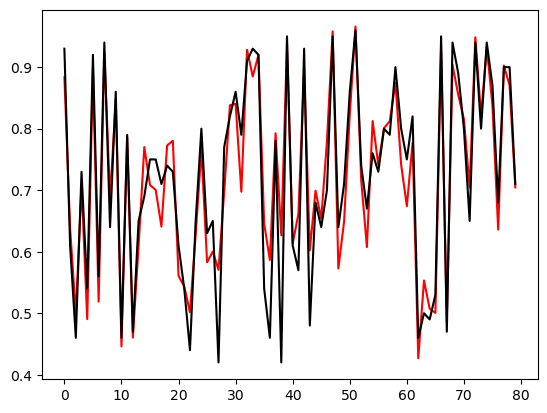

In [18]:
plt.plot(model.predict(xtest),color='Red')
plt.plot(ytest_np,color='Black')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
model1=RandomForestRegressor(n_estimators=100)

In [21]:
model1.fit(xtrain,ytrain)


RandomForestRegressor()

In [22]:
model1.score

<bound method RegressorMixin.score of RandomForestRegressor()>

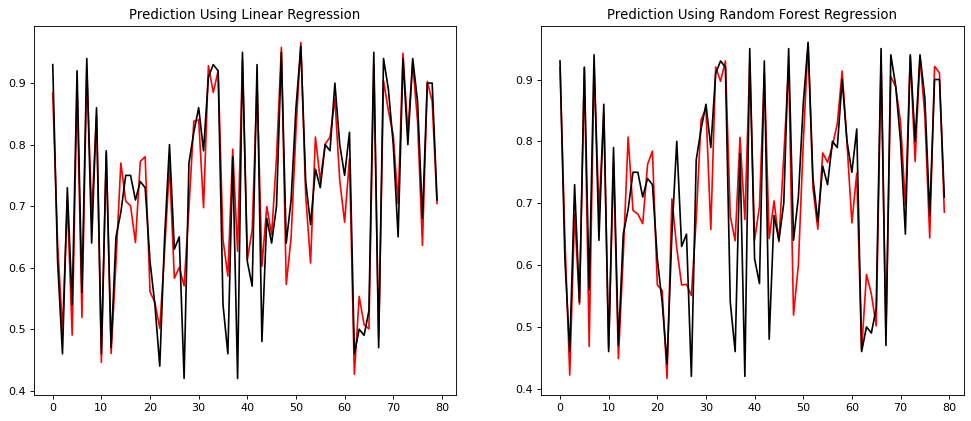

In [23]:
plt.figure(figsize=(15, 6), dpi=80)
plt.subplot(121)
plt.title("Prediction Using Linear Regression")
plt.plot(model.predict(xtest),color='Red')
plt.plot(ytest_np,color='Black')

plt.subplot(122)
plt.title("Prediction Using Random Forest Regression")
plt.plot(model1.predict(xtest),color='Red')
plt.plot(ytest_np,color='Black')
plt.show()